# Regressão Linear Simples

### O Pacote `palmerpenguins`

Informações aqui: [palmerpenguins](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/)

Caso não tenham instale o pacote com a função `install.packages("palmerpenguins")`

##### Carrega pacotes e define tamanho das figuras

In [2]:
#install.packages('palmerpenguins')
options(repr.plot.width=5, repr.plot.height=5)
library(tidyverse)
library(palmerpenguins)

### Verificando o conjunto de dados

In [6]:
data(penguins)
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [7]:
penguins %>% 
  distinct(species, island)

species,island
Adelie,Torgersen
Adelie,Biscoe
Adelie,Dream
Gentoo,Biscoe
Chinstrap,Dream


### Selecionando a espécie Gentoo

In [10]:
Gentoo = penguins %>% 
  filter(species == 'Gentoo') %>% 
  na.omit() 

head(Gentoo)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
Gentoo,Biscoe,46.1,13.2,211,4500,female,2007
Gentoo,Biscoe,50.0,16.3,230,5700,male,2007
Gentoo,Biscoe,48.7,14.1,210,4450,female,2007
Gentoo,Biscoe,50.0,15.2,218,5700,male,2007
Gentoo,Biscoe,47.6,14.5,215,5400,male,2007
Gentoo,Biscoe,46.5,13.5,210,4550,female,2007


##### Análise exploratória

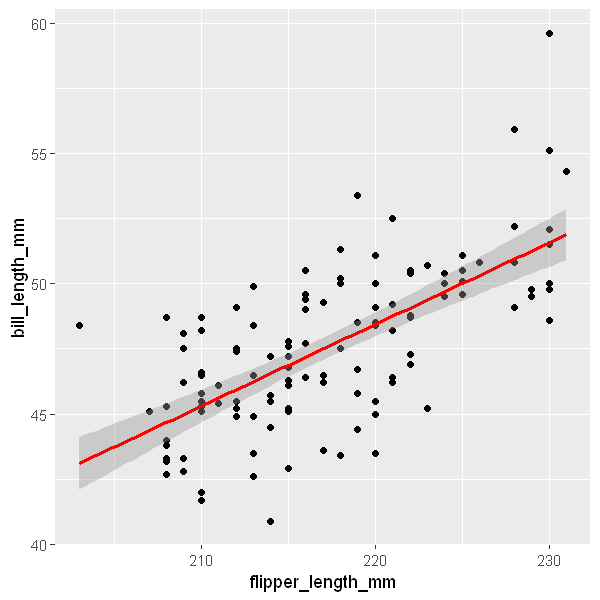

In [31]:
plt1 = ggplot(data = Gentoo, mapping = aes(x = flipper_length_mm, y = bill_length_mm)) +
    geom_point() +
    geom_smooth(method = 'lm', se = TRUE, color = 2)
plt1

### Regressão linear simples

$$Y_i = -20.48 + 0.31 X_i$$

##### Função ```lm```

In [15]:
m = lm(bill_length_mm ~ flipper_length_mm, data = Gentoo)
summary(m)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm, data = Gentoo)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6545 -1.5209 -0.0678  1.3123  8.0330 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -20.4879     7.0845  -2.892  0.00457 ** 
flipper_length_mm   0.3133     0.0326   9.611  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.332 on 117 degrees of freedom
Multiple R-squared:  0.4412,	Adjusted R-squared:  0.4364 
F-statistic: 92.37 on 1 and 117 DF,  p-value: < 2.2e-16


#### Intervalo de confiânça para $\hat{Y}$

In [34]:
?predict.lm

In [39]:
ic = predict.lm(m, interval = "confidence")
head(ic)

fit,lwr,upr
45.61466,45.03049,46.19883
51.56702,50.64059,52.49346
45.30138,44.67099,45.93177
47.80764,47.38142,48.23385
46.86779,46.42052,47.31505
45.30138,44.67099,45.93177


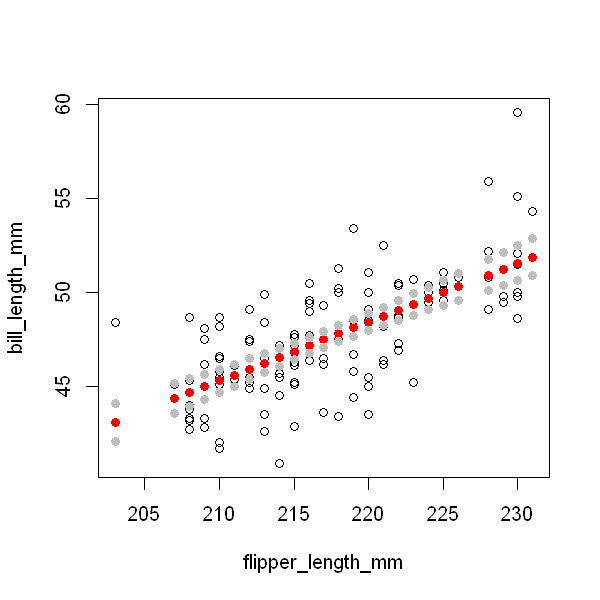

In [40]:
plot(bill_length_mm ~ flipper_length_mm, data = Gentoo)
points(y = ic[,'fit'], x = Gentoo$flipper_length_mm, col = 2, pch = 19)
points(y = ic[,'lwr'], x = Gentoo$flipper_length_mm, col = 'gray', pch = 19)
points(y = ic[,'upr'], x = Gentoo$flipper_length_mm, col = 'gray', pch = 19)


#### Intervalo de predição para $Y$

In [41]:
ip = predict.lm(m, interval = "prediction")
head(ip)

Warning message in predict.lm(m, interval = "prediction"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
45.61466,40.95969,50.26963
51.56702,46.85685,56.27720
45.30138,40.64039,49.96237
47.80764,43.16984,52.44543
46.86779,42.22802,51.50756
45.30138,40.64039,49.96237


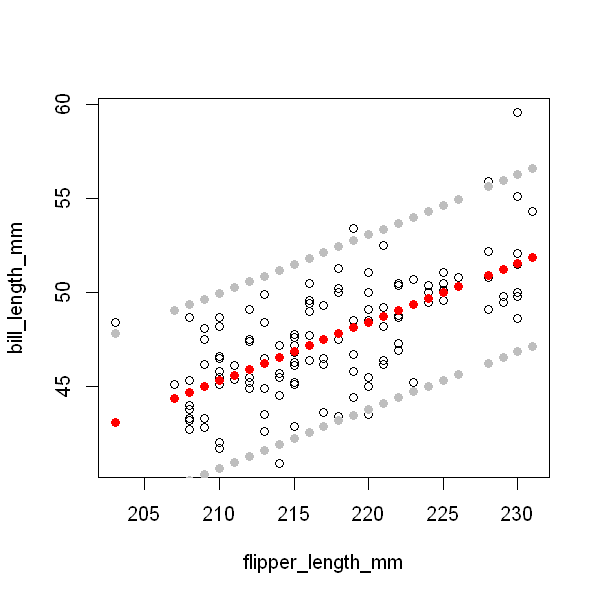

In [42]:
plot(bill_length_mm ~ flipper_length_mm, data = Gentoo)
points(y = ip[,'fit'], x = Gentoo$flipper_length_mm, col = 2, pch = 19)
points(y = ip[,'lwr'], x = Gentoo$flipper_length_mm, col = 'gray', pch = 19)
points(y = ip[,'upr'], x = Gentoo$flipper_length_mm, col = 'gray', pch = 19)